# Tercera entrega
## Curso Data Science 
____________________________________________________

## Estructurando un proyecto de Data Science (Parte I)
____________________________________________________
### Estudiante: Marvin Cruz Sandoval DNI: 95711072
### Profesor: Octavio Lafourcade
### Tutor: Giuliano Crena

________________________
_______________________

*Objetivo:* Crear un "Abstract", generar hipótesis y preguntas de interés para luego mediante la creación de tablas y gráficos obtener las interpretaciones y las respuestas a las cuestiones planteadas. 

## Abstract

El presente Notebook contiene el desarrollo del análisis del DataSet relacionado con información histótica de empresas eléctricas de LATAM y el CARIBE.  

### 1. Importación de librerías a utilizar



In [4]:
#Importamos las librerias a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Selección y carga de Dataset

De los 3 Datasets presentados inicialmente, se decide continuar con el Dataset denominado _Datos de acceso a electricidad Latinoamérica y el Caribe_

Este Dataset contine información sobre los indicadores de acceso a energía eléctrica de los paises de América Latina y el caribe, basado en información proporcionada por diferentes empresas y organismos gubernamentales. 

Fuente de datos: https://energydata.info/


In [6]:
#Carga de archivo .csv a utilizar

df= pd.read_csv("2.Latam data energy access_world_bank.csv", sep=";", )



#Muestra de encabezado de Data Frame
df.head(5)


,_id,country,utility name,utility code,utility ID,year,Type of connection,1,2,3,...,16,17,18,19,20,21,22,23,24,25
0,1,country,utility name,utility code,utility ID,year,Type of connection,Total number of connections (residential and ...,Total Number of residential connections in the...,Total electricity sold per year (MWh),...,Number of residential subscribers per 100 hous...,Number of customer complaints per year,Average duration between customer complaint an...,Average residential tariff (local nominal curr...,Average industrial tariff (local nominal curre...,Installation Cost (residential) local nominal ...,Installation Cost (Industrial) local nominal c...,Year of privatization,Residencial conexions per employee,Energy sold per employee
1,2,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
2,3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,4.293.683.333,3.694.916.667,118861.9,...,NaN,NaN,NaN,4.985.647.636,1.735.030.265,NaN,NaN,0,NaN,NaN
4,5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,4.612.191.667,40018.5,124118.5,...,NaN,NaN,NaN,7.285.148.198,1.816.219.628,NaN,NaN,0,NaN,NaN


In [7]:
# Obtenemos las dimensiones del Dataset
df.shape

(4075, 32)

In [8]:
#Obtenemos la info de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 4075 non-null   int64 
 1   country             4075 non-null   object
 2   utility name        4075 non-null   object
 3   utility code        4061 non-null   object
 4   utility ID          4052 non-null   object
 5   year                4061 non-null   object
 6   Type of connection  4061 non-null   object
 7   1                   2899 non-null   object
 8   2                   2916 non-null   object
 9   3                   3190 non-null   object
 10  4                   1438 non-null   object
 11  5                   2550 non-null   object
 12  6                   818 non-null    object
 13  7                   497 non-null    object
 14  8                   1284 non-null   object
 15  9                   1143 non-null   object
 16  10                  1283

Al obtener las dimensiones mediante el método "shape" se logra determinar que el Data Frame posee 4075 filas y 32 columnas, por otra parte, las columnas contienen datos de tipo objeto. 

______________________________________________________________________________________________________________________

#### Observación importante: Se verifica que los datos del index se encuentran en la 3a fila del data set (del csv cargado), mientras que la fila 1 contiene un correlativo de las columnas y la fila 2 posee información explicativa del contenido de cada columna. 
  
#### Se genera un array para almacenar la información explicativa del contedido de cada celda y se define la información de la fila No. 3 como encabezados de columna.

### 3. Preparación del Dataset

In [12]:
# Creando array para guardar las descripción de los campos para futura referencia. 

df_desc = df.iloc[0].to_numpy()

#Eliminando la 1a columna que es redundante

df_desc = np.delete(df_desc, 0)


for a in df_desc:
    #print(f"Columna {df_desc.index[a]} : {a}")
    i = list(df_desc).index(a)
    print(f"Descripción de Columna {i}: {a}")

Descripción de Columna 0: EMPRESA ELECTRICA LOS RIOS S.A.
Descripción de Columna 1: LOS RIOS
Descripción de Columna 2: 201001
Descripción de Columna 3: 1994
Descripción de Columna 4: Elec - Distribution
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 15: 0.246391955
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 5: nan
Descripción de Columna 27: 0
Descripción de Columna 5: nan
Descripción de Columna 5: nan


Luego se eliminan las primeras dos filas y se asigna la tercera como "index" para que el Data Frame sea cargado de manera correcta:

In [13]:
# Adecuando el dataset para el analisis
# Tomamos como encabezado lo contenido en fila 1

df.columns = df.iloc[1]

#Eliminamos las filas con infomación no relevante para el procesamiento del dataset

df=df.drop([0,1])

# Se elimina la columna 0 que no contiene información relevante, y que fue eliminada del array de descripción de campos 

df= df.drop(columns=[2])

# Se muestra el data set listo para el proceso de análisis
df.head()

KeyError: '[0, 1] not found in axis'

Se desea saber la cantidad de valores NAN que se están manejando en el Dataset

In [14]:
# analizando valores NAN
df_nan=df.isna().sum()
df_nan

3
Ecuador                               0
EMPRESA ELECTRICA LOS RIOS S.A.       0
LOS RIOS                             14
201001                               23
1995                                 14
Elec - Distribution                  14
4.293.683.333                      1176
3.694.916.667                      1159
118861.9                            885
NaN                                2637
NaN                                1525
1.289.702.588                      3257
NaN                                3578
NaN                                2791
NaN                                2932
NaN                                2792
0.248840986                        1575
NaN                                3521
NaN                                3525
NaN                                2699
NaN                                2793
NaN                                2446
NaN                                3525
NaN                                3739
4.985.647.636                      191

>Se observa un alto porcentaje de valores NAN en muchos campos.

>Se asume que los valores NAN deberían corresponder a los periodos mas antiguos posiblemente por falta de registro de los parámetros 

### 4. Gráficas en Matplotlib

TypeError: 'value' must be an instance of str or bytes, not a float

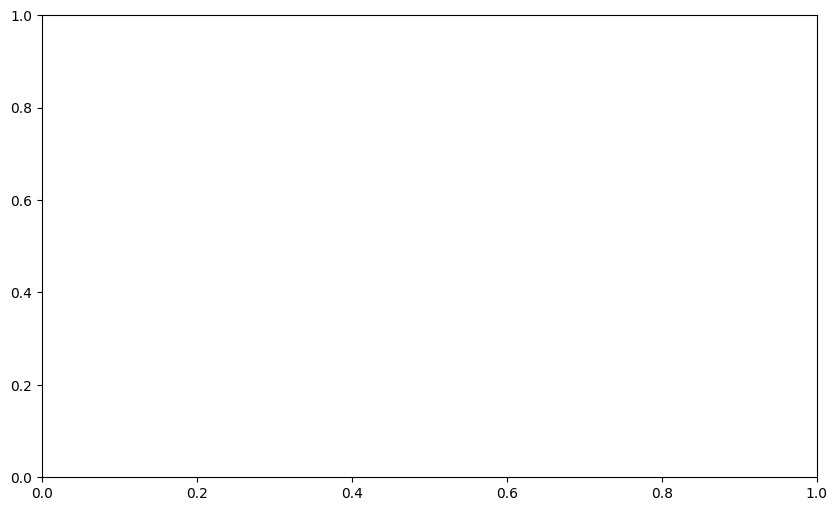

In [15]:

# Contamos los valores NAN por año

#Para efectos de analisis del Data Set se pueden graficar la cantidad de valores NAN por columna:

fig, ax = plt.subplots()

ax.bar(df_nan.index, df_nan.values, width=1, edgecolor="white", linewidth=0.7 )
plt.xticks(rotation=90)
plt.figure(figsize=(5, 5))
ax.set_title('Valores NAN por año')

plt.show()

Se aprecia de manera gráfica que la cantidad de valores NAN es elevada para el dataset elegido. 

Como primera impresión se podría tender a pensar que el dataset no es adecuado para el análisis, no obstante dentro del comportamiento observado surge la interrogante de si la situación de los valores NAN tiene relación con l aantiguedad de los registros (En las decadas pasadas la información en general no estaba disponible, además presumiblemente no se gestionaban indicadores) 

Para verificar lo anterior se crea la siguiente grafica donde se totalizan los registros válidos disponibles (para todos los campos de datos) en función del año: 

In [16]:

#Obtenemos un Dataframe con el conteo de regitros agrupados por año

df_nancount=df.groupby('year').count()
df_nancount


KeyError: 'year'

Se seleccionan 3 parámetros para evaluar la cantidad de datos que se fueron obteniendo en el tiempo

NameError: name 'df_nancount' is not defined

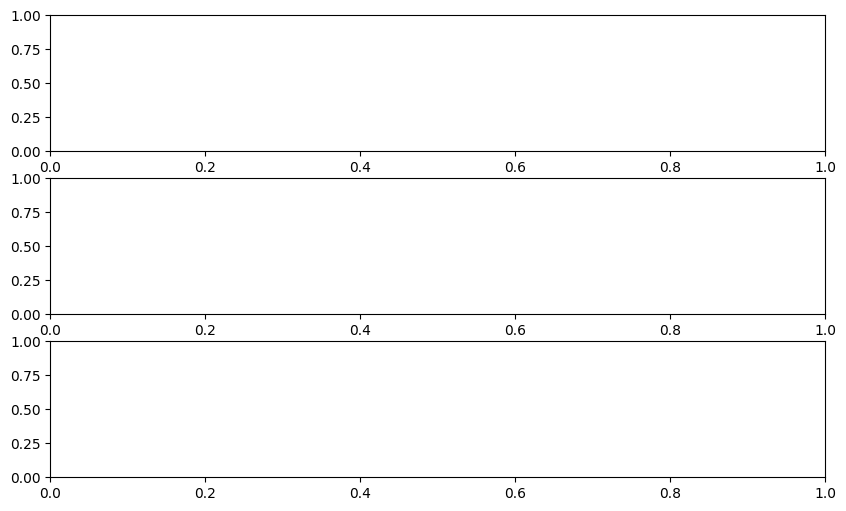

In [17]:
# Grafico de linea de 4 parámetros seleccionados para ver la evaluación de registros en el tiempo:

fig, ax = plt.subplots(3,1)



ax[0].plot(df_nancount.index, df_nancount['mwh_sold'], linewidth=2.0)

ax[1].plot(df_nancount.index, df_nancount['d_losses'], linewidth=2.0)

ax[2].plot(df_nancount.index, df_nancount['coverage'], linewidth=2.0)

#ax[1,1].plot(df_nancount.index, df_nancount['complains'], linewidth=2.0)




fig.suptitle("Evolución de la disponibilidad de información") # titulo general para mis graficos!
ax[0].set_title('mwh_sold', fontsize=12, color="blue") 
ax[1].set_title('d_losses', fontsize=12, color="blue") 
ax[2].set_title('coverage', fontsize=12, color="blue") 
#ax[1, 1].set_title('complains', fontsize=12, color="blue") 


#El sigiuente método es para mantener ajuste entre los subgráficos

fig.tight_layout()

#Rotamos el texto del gráfico

fig.autofmt_xdate(rotation=90)






Se observa que el tal como se presumía, la disponibilidad de información para los 2 parámetros elegidos comienza a ser relevante durante la década de 1980. El decrecimiento en los últimos períodos puede responder a la demora o  tiempo de "desclasificación" de la información por empresas y organismos de control. 

Tiene sentido pensar que en los últimos años la disponibilidad de la información se ha ido incrementando en todos los sectores, influenciado por el monitoreo de indicadores por parte de los organismos de control así como por la incursión de la gestión basada en sistemas de la información. 

Con el filtrado anterior se realizará la graficación de la evolución del % de perdidas totales en la res de distribución promediando por año y por país. Se decide utilizar un gráfico tipo línea. 

In [ ]:
# Transformando los datos de perdidas porcentuales en valores numericos para procesamiento y graficación:

df['d_losses'] = pd.to_numeric(df['d_losses'], errors='coerce')
df['n_con'] = pd.to_numeric(df['n_con'], errors='coerce')
df['mwh_sold'] = pd.to_numeric(df['mwh_sold'], errors='coerce')


In [ ]:
#Obteniendo el promedio de perdidas de energía por año para graficar:

df_meanloss=df.groupby('year').mean()
df_meanlosscountry=df.groupby('country').mean()

C:\Users\mcruz\AppData\Local\Temp\ipykernel_2268\1341766324.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_meanloss=df.groupby('year').mean()
C:\Users\mcruz\AppData\Local\Temp\ipykernel_2268\1341766324.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_meanlosscountry=df.groupby('country').mean()


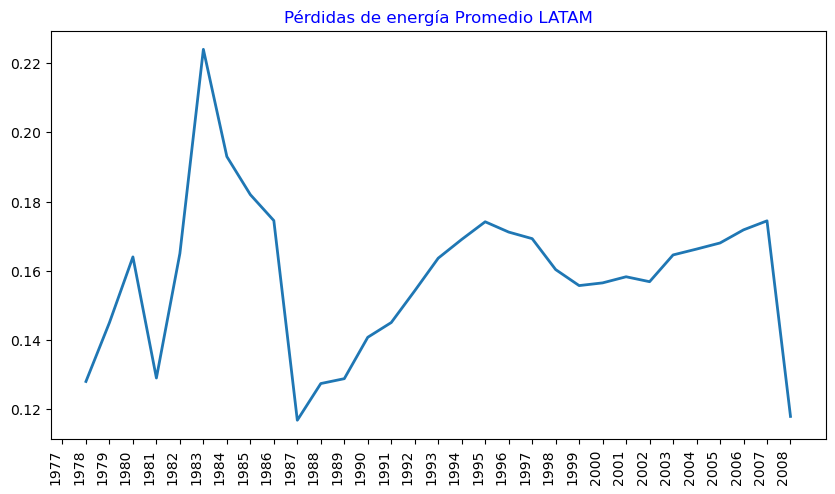

In [ ]:
#Graficando la evolución del % de pérdidas promedio por año. 

fig, ax = plt.subplots()

ax.plot(df_meanloss.index, df_meanloss["d_losses"], linewidth=2.0)
ax.set_title("Pérdidas de energía Promedio LATAM", fontsize=12, color="blue") 
fig.autofmt_xdate(rotation=90)


Observaciones importantes:

>>Se observan registros de pérdidas de energía a partir de 1978. 

>>Durante la década de los 80´ se registra un incremento en el índice de pérdidas de energía en la región llegando a un pico de 22%

>>En la década del 2000 los niveles promedio de pérdidas de energía en las redes se situan en el orden del 15%. 

>>A partir del 2007 se ve una caida abrupta, relacionada con al poca disponibilidad de información, por lo que se determina que el anális es valido hasta 2007. 

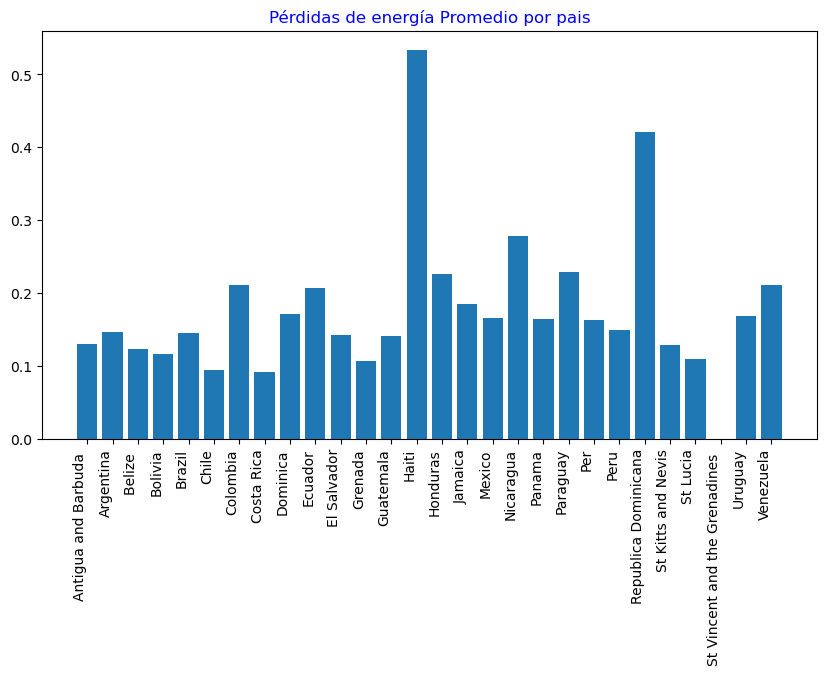

In [ ]:
#Graficando la evolución del % de pérdidas promedio por pais. 

fig, ax = plt.subplots()

ax.bar(df_meanlosscountry.index, df_meanlosscountry["d_losses"], linewidth=2.0)
ax.set_title("Pérdidas de energía Promedio por pais", fontsize=12, color="blue") 
#Agregamos rotacion a nombre de pais para mejorar la visualizacion 
fig.autofmt_xdate(rotation=90)


Observaciones importantes:

>Destacan Haití y República Dominicana con niveles de pérdidas muy por encima del promedio regional

>Costa Rica y Chile destacan por su indicador menor que el promedio.

### 5. Graficas en Seaborn

Para el presente apartado se buscará analizar si existe relación entre las perdidas de energía vs la energía transportada, asi como los parámetros por pais, mediante un boxplot con el que ademas se verificara si existen outlyers. 
Por otra parte se buscará determinar si existe relación entre las pérdidas de energia y el volumen de energía manejado.

In [ ]:
# Obteniendo la tabla para graficar

from matplotlib import rcParams
# Aumentmos el tamaño de la grafica para observar claramente la grafica. 
rcParams['figure.figsize'] = 10,6

#Creamos el boxplot.
boxplot=sns.boxplot(x="country",
                y="d_losses",
                data=df)

#Agregamos rotación a los ejes:
a=boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)


NameError: name 'df' is not defined

Se observa que Brasil posee la mayor cantidad de valores outlyers, seguido por Argentina y Bolivia. Para el caso de Haiti se considera que tiene la mayor cantidad de Perdidas de energía de la region, con un promedio, y valores caracteisticos del boxplot excepcionalmente altos comparados con el resto de paises. 

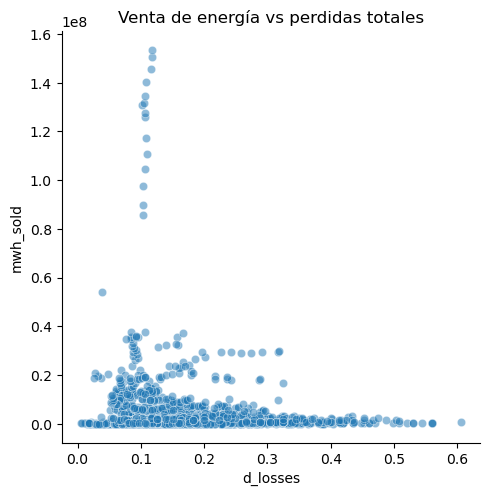

In [ ]:
#Creamos grafico Energia vendida vs perdidas de energía

sns.relplot(data=df, x="d_losses", y="mwh_sold",alpha=0.5).set(title='Venta de energía vs perdidas totales')


Se aprecia que las perdidas de energía tienen mayor concentración en torno a valores del 10%, existe una linea de datos atípica que presenta un volumen de energía muy superior al resto que a su vez tiene un indicador de pérdidas en el rango del 10%.

A continuación se realiza una gráfica de valor de energía transportada por país para buscar si este comportamiento puede atribuirse a un pais específico, o se encuentra disperso en varios paises. 


C:\Users\mcruz\AppData\Local\Temp\ipykernel_2268\434201869.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g=sns.catplot(data=df, x="country", y="mwh_sold",  palette="deep").set(title='Energia por pais')


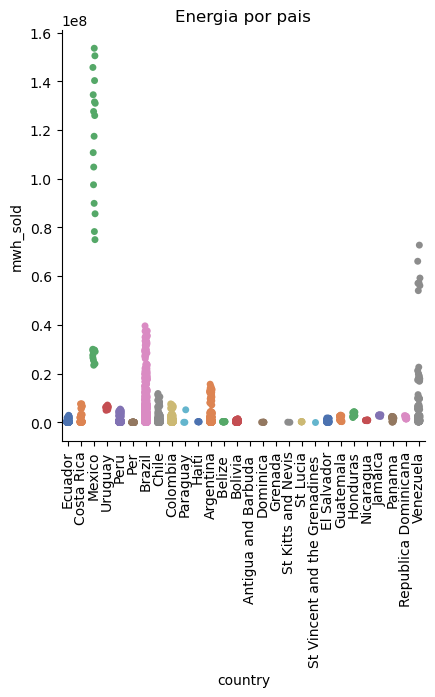

In [ ]:
#Creamos gráfico de volumen de energía por país

g=sns.catplot(data=df, x="country", y="mwh_sold",  palette="deep").set(title='Energia por pais')

#Agregamos rotacion a las etiquetas del gráfico
g.set_xticklabels(rotation=90)

En la gráfica anterior se observa claramente que el nivel de consumo energético de México es notablemente superior al resto, pero con un índice de pérdidas muy "normal" (alrededor del 10% de la energía consumida). Dicho país corresponde a los registros atípicos observados en la anterior gráfica. 

[Text(0.5, 1.0, 'Distribución de cantidad de interrupciones')]

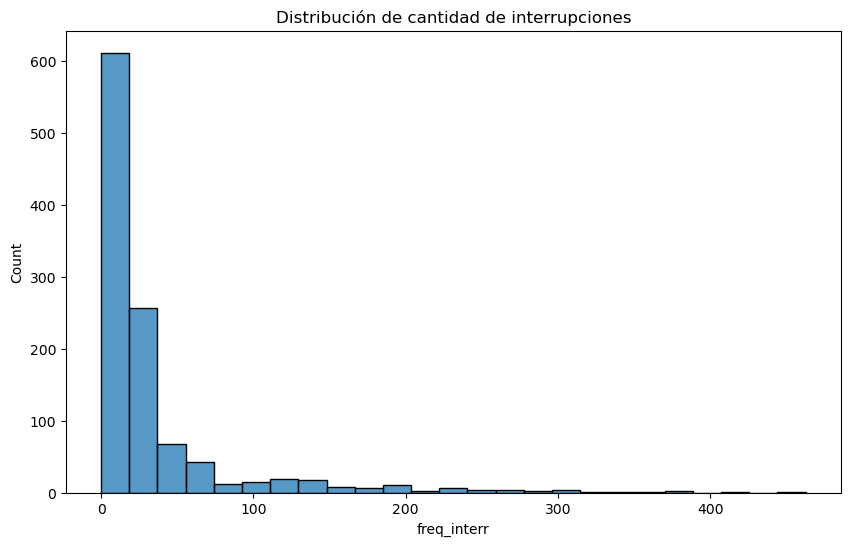

In [ ]:
#Se busca graficar en un histograma la distribución de las frecuencias de interrupción del suministro eléctrico a los abonados

df['freq_interr'] = pd.to_numeric(df['freq_interr'], errors='coerce')

#Se desea conocer la distribución de estos datos mediante un histograma  (numero de interrupciones por año)

sns.histplot(data=df, x="freq_interr", bins=25).set(title='Distribución de cantidad de interrupciones')


Se observa que la distribución de la frecuencia de interrupción en su mayoría se agrupa en el intervalo menor a 25 interrupciones por año por usuario

## 6. Comentarios finales

Para proximas entregas se mejorará el acondicionamiento del Dataset verificando que se normalice el tipo de dato en los campos nnumericos. 

Se considerara reemplazar los nombres de pais por nombres cortos para mejorar la legibilidad cuando se grafiquen datos por pais. 

Se considera recomendable ahondar en la mejora de los colores y datos mostrados en los graficos.